In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# this comand will create graphs in Jupyter notebook
# rather than in a separate window

In [2]:
concentration, data_y = np.loadtxt("ZnFeO_small_yellow.csv", delimiter=';', unpack=True)  # upload data from a file

In [3]:
control = np.array([24, 23.3, 23.8, 23.5, 23.6, 23.4])  # create an array of control temp values 
data_x = np.arange(30, 181, 30)   # create an array of time values
#data_x = np.tile(data_x, 7)
col = np.array([u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf'])  # array with colour codes for plotting
labels = np.array(["5\u03BCg/ml", "10\u03BCg/ml", "15\u03BCg/ml", 
                   "20\u03BCg/ml", "40\u03BCg/ml", "50\u03BCg/ml", "80\u03BCg/ml"])

In [4]:
# subtract the control values from the actual temperature values

j = 0
data_y_corr = np.zeros(len(data_y))

# every 6 values in data_x array start subtracting from the first value
# of the control array again 
for i in range(0, len(data_y)):
    data_y_corr[i] = data_y[i] - control[j]
    j += 1
    if(j == 6):
        j = 0
        
print(data_y_corr)

[ 4.8  5.9  4.8  5.4  5.4  5.7  3.1  4.   3.5  3.6  3.5  3.2  7.   8.
  8.3  7.3  8.   7.2 15.2 14.7 15.5 16.4 16.7 16.5 23.2 23.7 25.  23.7
 21.7 23.1 19.5 20.1 19.1 22.1 20.  21.5 19.4 21.7 20.6 21.5 21.4 21.8]


In [5]:
# define a function that will be plotting least square fit straight lines
def least_square_fit(data_x, data_y, j):
    mean_x = np.mean(data_x)    # calculate mean value of x coordinates
    mean_y = np.mean(data_y)    # calculate mean value of y coordinates
    m = np.sum((data_y - mean_y)*data_x) / np.sum((data_x - mean_x)*data_x)
    c = mean_y - m*mean_x

    n = len(data_x)    # calculate the number of pairs of coordinates
    D_calc = np.sum((data_x - mean_x)**2)
    sum_d2 = np.sum((data_y - m*data_x - c)**2)

    dm = np.sqrt(sum_d2 / (D_calc*(n-2)))    # calculate uncertanity in m
    dc = np.sqrt(((1/n) + (mean_x**2/D_calc)) * (sum_d2 / (n-2)))    # calculate uncertanity in c
    
    # create two arrays
    fit_x = np.linspace(np.min(data_x), np.max(data_x), 2)
    fit_y = m * fit_x + c
    
    # plot the line
    plt.plot(fit_x, fit_y, '-', color=col[j-1])
    # plot the data points
    plt.plot(data_x, plot_y, 'o', color=col[j-1], label = labels[j-1])

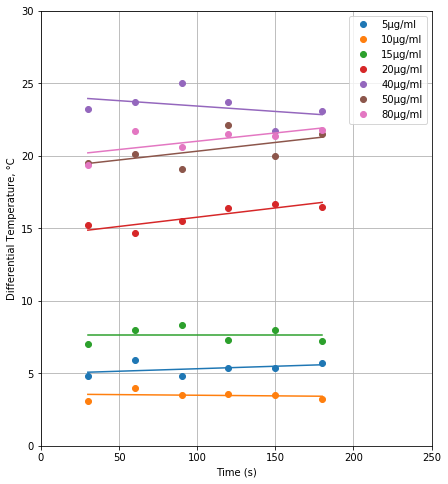

In [6]:
plt.figure(figsize=(7,8))
 
# plot data points 7 times
start = 0
end = 6
j = 1

for i in range(0, 7):
    plot_y = data_y_corr[start:end]
    least_square_fit(data_x, plot_y, j)
    start = end
    end += 6
    j += 1
    
# set the graph parametres
plt.grid(True)
# plt.title("$Zn_{0.4}Fe_{2.6}O_4$ Small Nanoparticles on a Yellow Membrane")
plt.legend(loc="upper right")
plt.xlim(0, 250)
plt.ylim(0,30)
plt.ylabel("Differential Temperature, \u00b0C")
plt.xlabel("Time (s)")
plt.savefig("ZnFeO_small_yellow.png", dpi = 300)